# Maximum Likelihood Estimation


In [94]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt

import scipy.stats as sts
from scipy.stats import lognorm

import seaborn as sns
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


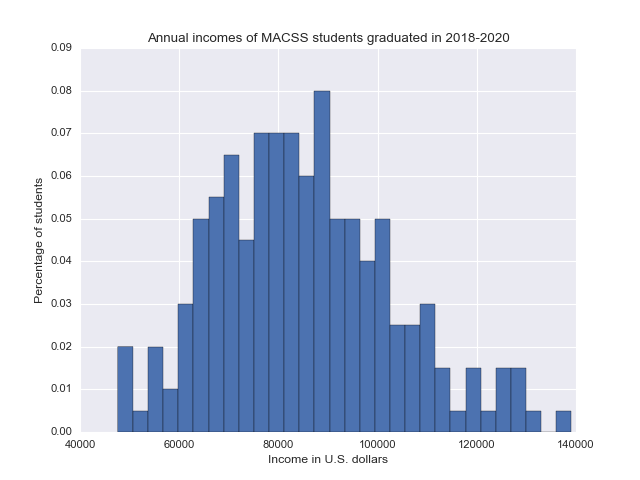

In [101]:
# (a) Plot a histogram of percentages of the income.txt data with 30 bins. 
dt = np.loadtxt('incomes.txt')

fig, ax = plt.subplots()
weights = (1./dt.shape[0]) * np.ones_like(dt)
plt.hist(dt, 30, weights=weights)

plt.title('Annual incomes of MACSS students graduated in 2018-2020')
plt.xlabel('Income in U.S. dollars')
plt.ylabel('Percentage of students')
plt.show()

<IPython.core.display.Javascript object>


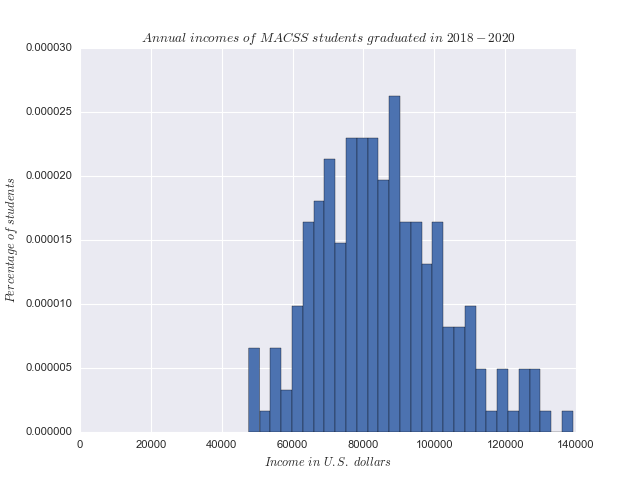

In [102]:
# Creating the second histogram with normed = True
fig, ax = plt.subplots()

def plt_dt():
    plt.hist(dt, 30, normed=True)

plt_dt()
plt.title(r'$Annual\ incomes\ of\ MACSS\ students\ graduated\ in\ 2018-2020$')
plt.xlabel(r'$Income\ in\ U.S.\ dollars$')
plt.ylabel(r'$Percentage\ of\ students$')
plt.xlim([0, 140000])  # This gives the xmin and xmax to be plotted"
plt.show()

Log likelihood value for this parameterization and data is:
-8298.63695601


<IPython.core.display.Javascript object>


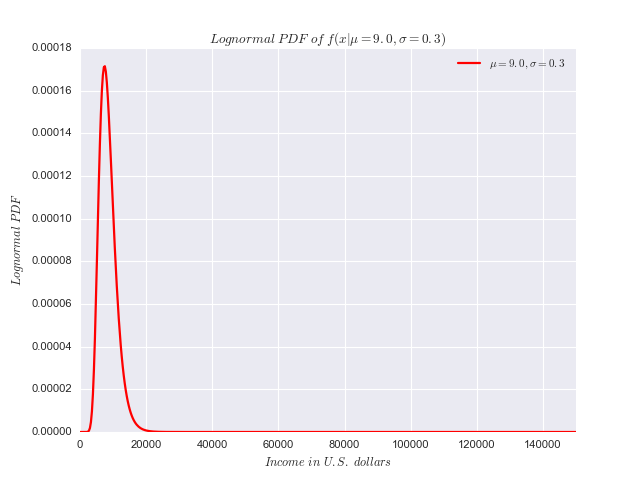

In [70]:
# (b) Plot the lognormal PDF f(x|μ = 9.0,σ = 0.3) for 0 ≤ x ≤ 150,000. 
# What is the value of the log likelihood value for this parameterization of the distribution and given this data?

# Function:
# Define log likelihood function for the normal distribution
def log_lik_lognorm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    
    pdf_vals = lognorm(s =sigma, scale =np.exp(mu)).pdf(xvals)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    
    return log_lik_val

# Answer:

print('Log likelihood value for this parameterization and data is:')
print(log_lik_lognorm(dt, 9, 0.3))

# Graph:

dist_pts = np.linspace(0, 150000, 500)
mu_1 = 9
sig_1 = 0.3

fig, ax = plt.subplots()

def plt_lognorm():
    plt.plot(dist_pts, lognorm(scale = np.exp(mu_1), s = sig_1).pdf(dist_pts),
        linewidth=2, color='r', label = r'$\mu=9.0,\sigma=0.3$')
    
plt_lognorm()
plt.title(r'$Lognormal\ PDF\ of\ f(x|\mu=9.0,\sigma=0.3)$')
plt.ylabel(r'$Lognormal\ PDF$')
plt.xlabel(r'$Income\ in\ U.S.\ dollars$')
plt.xlim(dist_pts[0], dist_pts[-1])
plt.legend(loc = 'best')


85276.8236063 17992.542128
[ 11.35365799   9.79771262]


<IPython.core.display.Javascript object>


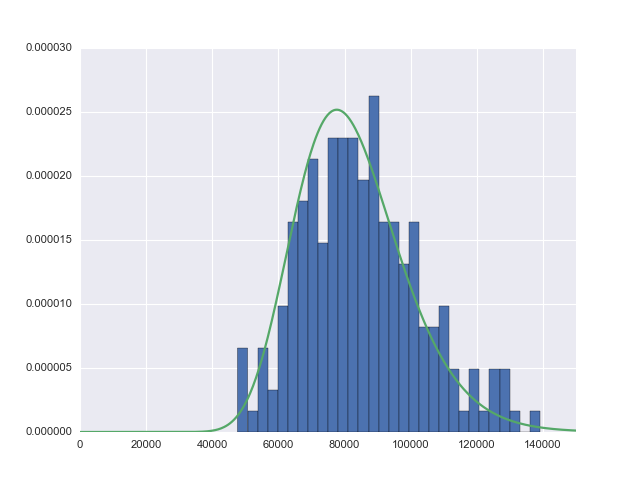

mu_MLE= 11.3314403294 sig_MLE= 0.211674581429
The value of the likelihood function:  -2239.534744
VCV matrix:
 [[ 0.00020319 -0.00012467]
 [-0.00012467  0.00012139]]


<IPython.core.display.Javascript object>


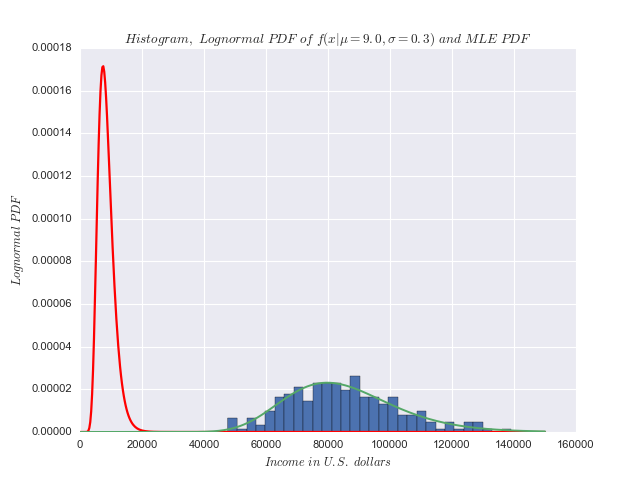

In [83]:
# (c) Estimate the parameters of the lognormal distribution by maximum likeli-
# hood and plot its PDF against the PDF from part (b) and the histogram from part (a).
# Report the ML estimates for μ and σ, the value of the likelihood function, and the variance-covariance matrix.

# Function
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

print(dt.mean(), dt.std())
print(np.log(np.array([dt.mean(), dt.std()])))

# Test and guess
test_mu, test_sigma = 11.3, 0.2

fig, ax = plt.subplots()
plt_dt()
plt.plot(dist_pts, sts.lognorm.pdf(dist_pts, s = test_sigma, scale = 
                                    np.exp(test_mu)), lw = 2)
plt.xlim(0, 150000)

# MLE
mu_init = 11.3
sig_init = 0.2
params_init = np.array([mu_init, sig_init])
mle_args = dt
results = opt.minimize(crit, params_init, args = mle_args)
mu_MLE, sig_MLE = results.x
vcv_mle = results.hess_inv

# Answer:
print('mu_MLE=', mu_MLE, 'sig_MLE=', sig_MLE)
print('The value of the likelihood function: ',
      log_lik_lognorm(dt, mu_MLE, sig_MLE))
print('VCV matrix:\n',
      vcv_mle)

# Graph:
fig, ax = plt.subplots()
plt_dt()
plt_lognorm()
plt.plot(dist_pts, sts.lognorm.pdf(dist_pts, s = sig_MLE, scale = 
                                    np.exp(mu_MLE)),
            label = '$\mu = {:.2f}, \sigma = {:.2f}$'.format(mu_MLE, sig_MLE))
plt.title(r'$ Histogram,\ Lognormal\ PDF\ of\ f(x|\mu=9.0,\sigma=0.3)\ and\ MLE\ PDF$')
plt.ylabel(r'$Lognormal\ PDF$')
plt.xlabel(r'$Income\ in\ U.S.\ dollars$')

In [87]:
# (d) Perform a likelihood ratio test

log_lik_h0 = log_lik_lognorm(dt, mu_1, sig_1) # Distribution in Part B
log_lik_mle = log_lik_lognorm(dt, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)  # The second para is the df

print('p-value of the LR test: {:.10f}'.format(pval_h0))

p-value of the LR test: 0.0000000000


In [89]:
# (e) What is the probability that you will earn more than $100,000?

print('Prob of earning less than 75,000: ',
      sts.lognorm.cdf(75000, s = sig_MLE, scale = np.exp(mu_MLE)))
print('Prob of earning more than 100,000: ',
      1 - sts.lognorm.cdf(100000, s = sig_MLE, scale = np.exp(mu_MLE)))

Prob of earning less than 75,000:  0.307939615728
Prob of earning more than 100,000:  0.195617998589


<IPython.core.display.Javascript object>


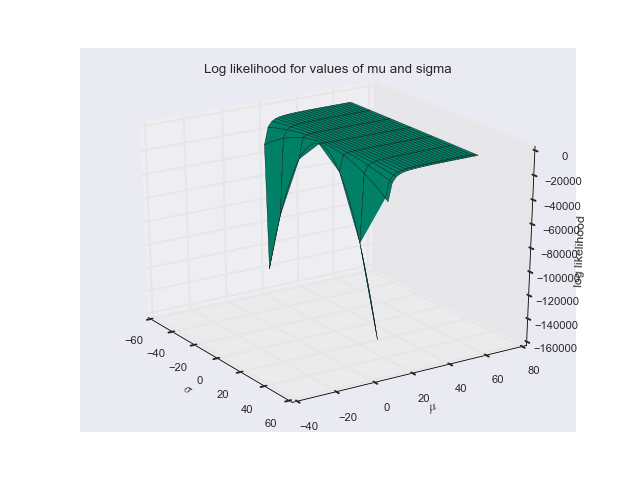

In [93]:
# extra: 3D plot of the criterion function
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

mu_vals = np.linspace(mu_MLE - 50, mu_MLE + 50, 50)
sig_vals = np.linspace(sig_MLE - 50, sig_MLE + 50, 50)
lnlik_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = log_lik_lognorm(dt, mu_vals[mu_ind],
                                                   sig_vals[sig_ind])

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

In [96]:
# 2. (a)

sick = pd.read_csv('sick.txt')
sick.rename(columns = {'\ufeffsick': 'sick'}, inplace = True)
sick.columns

# Function
def norm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.norm.cdf(cutoff, loc=mu, scale=sigma)
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

def log_lik_ols(sick, b0, b1, b2, b3, sigma_ols):
    xvals = sick.sick - b0 - b1*sick.age - b2*sick.children - \
              b3*sick.avgtemp_winter
    pdf_vals = norm_pdf(xvals, 0, sigma_ols, 'None')
    #pdf_vals = sts.norm.pdf(xvals, 0, sigma_ols)
    #pdf_vals = sts.lognorm.pdf(xvals, s = sigma_ols, scale = np.exp(0))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit(params, *args):
    b0, b1, b2, b3, sigma_ols = params
    sick = args[0]
    log_lik_val = log_lik_ols(sick, b0, b1, b2, b3, sigma_ols)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

b0_init, b1_init, b2_init, b3_init = 0.0, 0.0, 0.0, 0.0
sigma_ols_init = 0.1

params_init = np.array([b0_init, b1_init, b2_init, b3_init, sigma_ols_init])
mle_args = sick
results1 = opt.minimize(crit, params_init, args = mle_args) 
# If no bounds given, the opt.minimize(method = 'BFGS') by default
# Because sigma can't be negative, therefore we need to provide bounds 
# and specific optimize method (L-BFGS-B / SLSQP / TNC). But only L-BFGS-B give you hess_inv.
results1

      fun: -876.8650649861532
 hess_inv: array([[  6.41497199e-07,  -2.71857992e-09,  -4.75566251e-08,
         -8.91104854e-09,  -3.46835348e-09],
       [ -2.71857992e-09,   2.99140897e-09,  -2.71213758e-08,
         -1.67483907e-09,   1.18280376e-09],
       [ -4.75566251e-08,  -2.71213758e-08,   2.82593790e-07,
          1.53169655e-08,  -1.23778613e-08],
       [ -8.91104854e-09,  -1.67483907e-09,   1.53169655e-08,
          1.16298211e-09,  -5.03027815e-10],
       [ -3.46835348e-09,   1.18280376e-09,  -1.23778613e-08,
         -5.03027815e-10,   1.83823414e-08]])
      jac: array([   4.18345642,  225.44781494,   -1.96592712,  309.35083771,
         12.5634613 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 2128
      nit: 41
     njev: 301
   status: 2
  success: False
        x: array([ 0.25164576,  0.01293359,  0.40049954, -0.00999178,  0.00301797])

In [99]:
bounds = ((None, None),(None, None),(None, None),(None, None),(1e-30, None))
results = opt.minimize(crit, params_init, args = mle_args, 
                       method = 'SLSQP',
                       bounds = bounds)
results
params_init = results.x
results2 = opt.minimize(crit, params_init, args = mle_args, 
                       method = 'L-BFGS-B',
                       bounds = bounds)
results2

print('The estimates for b0, b1, b2, b3, sigma are as follows: ')
print(results.x)

print('The VCV matrix is as follows: ')
results2.hess_inv.todense()

# Therefore, if not success, try either
# Plug results.x into opt.minimize() as params_init and run again, or
# Change the method and provide bounds

The estimates for b0, b1, b2, b3, sigma are as follows: 
[ 0.25186114  0.0129362   0.40045528 -0.00999718  0.01205762]
The VCV matrix is as follows: 


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [100]:
# (b) Use a likelihood ratio test to determine the probability that β0 = 1.0, σ2 = 0.01 and β1,β2,β3 = 0. 

log_lik_h0 = log_lik_ols(sick, 1.0, 0.0, 0.0, 0.0, 0.1)

b0, b1, b2, b3, sigma_ols = results.x
log_lik_mle = log_lik_ols(sick, *results.x)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)  # The second para is the df

print('p-value of the LR test: {:.10f}'.format(pval_h0))

p-value of the LR test: 0.0000000000
